## Tool for processing RTXI single action potential data

The program below will allow you to easily visualize RTXI single action potential data. It will also create and save a **.csv** file into your **data** folder with a row with information on each action potential in the data. The columns in the **.csv** file are as follows:
- **Start:** The index location of the start of each action potential.
- **End:** The index location of the end of each action potential.
- **Class:** Whether an action potential is spontaneous or not and, if non-spontaneous, the frequency at which this action potential was paced.
- **Cycle Lengths (s):** The cycle length, in seconds, of each action potential.
- **Diastolic Intervals pre-AP (s):** The diastolic interval, in seconds, leading up to each non-spontaneous action potential. If an action potential is spontaneous, this column will be blank.
- **Duration X% (s):** The duration, in seconds, of each action potential at a repolarization percent of X.
- **Amplitude (V):** The amplitude, in volts, of each action potential.
- **MDP (V):** The maximum diastolic potential, in volts, of each action potential.
- **Shape Factor:** The shape factor of each action potential.
- **dv/dt Max (V/s):** The maximum upstroke velocity, in volts per second, of each action potential.

To visualize the data and create the **.csv** file, follow the steps below.

### 1. Load functions from load_h5.py

The functions needed to import and analyze RTXI h5 files in Python are saved in the file **load_h5.py**. Use the code below to load them into this notebook.

In [2]:
from load_h5 import *

### 2. Load your trial data

In the current directory, create a folder called **data** and copy your .h5 file into this folder. Once you've done that, change the `filename` variable in the code below to the name of your file in the **data** folder (it should end in **.h5**) as follows:
```
'YOUR_FILE_NAME.h5'
```

Set the `trial_number` variable to an integer that corresponds to your desired trial number. If you don't know your trial number, try a few out, starting from 1 and counting up. The code below will save the data to the variable `recorded_data`. You can adjust the `trial_number` variable until you find the data you want. If you want it to print the tags and plot the voltage/current curves for the given trial, set `does_plot` to `True`.

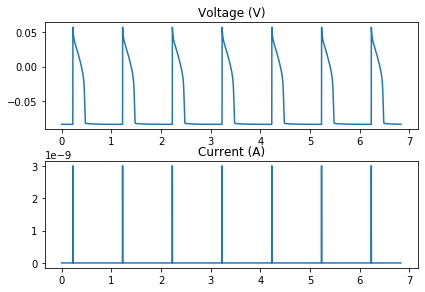

In [3]:
filename = '1Hz_offbyone_test_2.h5'
trial_number = 1
does_plot = True
no_tag = True
recorded_data = load_recorded_data(filename, trial_number, does_plot, no_tag)

### 3. Calculate and save action potential features

If you've already run the `get_ap_features` function on the current data set, do part **B**. If not, do part **A**.
#### A.
The code below will create a DataFrame with lots of useful information on the entire data set. The DataFrame will be saved to the variable `ap_features`. It will also be saved to a new file in the **data** folder. Change `filename` to what you would like the new file to be named.

In [3]:
filename = '1hz_test'
ap_features = get_ap_features(recorded_data, filename)

#### B.

The function below will load the saved DataFrame with the features of your data set. The DataFrame will be saved to the variable `ap_features`. Change `filename` to the name of the file your DataFrame is saved to.

In [ ]:
filename = 'YOUR_CSV_FILE_NAME'
ap_features = load_ap_features(filename)

### 4. Summarize action potentials by frequency

After creating the data table, you can use it to find what kinds of action potentials are in your data. The code below will tell you how many APs of each class are in your data. Set `does_plot` to `True` if you would also like it to plot one action potential from each class.

6 non_spontaneous_10.0_Hz action potentials


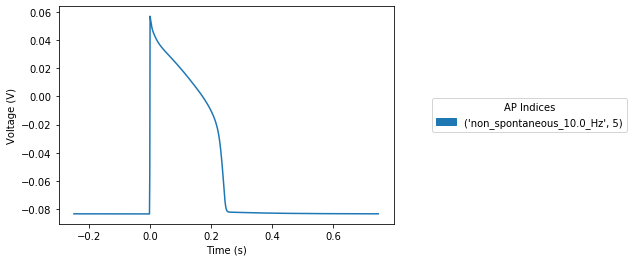

In [4]:
does_plot = True
class_tags = get_class_tags(recorded_data, ap_features, does_plot)

### 5. Plot all single action potentials and features

This function below will create an interactive plot of all the action potentials with a slider labeled **ap_number**. Move the slider to plot different action potentials in the data. You can use the **feature** dropdown menu to select different features of the action potentials, or just look at the action potentials themselves.

In [5]:
graph_sap_features_interact(ap_features, recorded_data)

interactive(children=(IntSlider(value=3, description='ap_number', max=6, min=1), Dropdown(description='feature…

### 6. Graph action potential features

This function will plot information across the entire DataFrame. Use the **feature** dropdown menu to select the feature of the action potentials you want to plot.

In [6]:
graph_column_interact(ap_features)

interactive(children=(Dropdown(description='feature', options=('cycle lengths', 'diastolic intervals', 'restit…